In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd


file_path = "/content/drive/My Drive/cybersecurity_intrusion_data.csv"
data = pd.read_csv(file_path)


In [ ]:
print(data.head())

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

In [ ]:
print(data.columns)


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')


In [ ]:

print(data.info())
print(data.isnull().sum())
print("Columns:", data.columns)
print("Target Column Unique Values:", data["attack_detected"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_rep

In [ ]:
# Convert categorical features to numerical (One-Hot Encoding)
categorical_cols = ["protocol_type", "browser_type"]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Convert target variable to binary (if not already 0s and 1s)
if data["attack_detected"].dtype == 'object':
    data["attack_detected"] = data["attack_detected"].apply(lambda x: 1 if x == "Attack" else 0)

# Display updated dataset
print(data.head())


  session_id  network_packet_size  login_attempts  session_duration  \
0  SID_00001                  599               4        492.983263   
1  SID_00002                  472               3       1557.996461   
2  SID_00003                  629               3         75.044262   
3  SID_00004                  804               4        601.248835   
4  SID_00005                  453               5        532.540888   

  encryption_used  ip_reputation_score  failed_logins  unusual_time_access  \
0             DES             0.606818              1                    0   
1             DES             0.301569              0                    0   
2             DES             0.739164              2                    0   
3             DES             0.123267              0                    0   
4             AES             0.054874              1                    0   

   attack_detected  protocol_type_TCP  protocol_type_UDP  browser_type_Edge  \
0                1       

In [ ]:
# Define features (X) and target (y)
X = data.drop("attack_detected", axis=1)
y = data["attack_detected"]

# Print dataset shape
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (9537, 14)
Target Shape: (9537,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 6675
Testing samples: 2862


In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



In [ ]:
import numpy as np

print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in X_test:", np.isnan(X_test).sum().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())


NaN values in X_train: 0
NaN values in X_test: 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [ ]:
print(data.isnull().sum())


session_id                 0
network_packet_size        0
login_attempts             0
session_duration           0
encryption_used         1966
ip_reputation_score        0
failed_logins              0
unusual_time_access        0
attack_detected            0
protocol_type_TCP          0
protocol_type_UDP          0
browser_type_Edge          0
browser_type_Firefox       0
browser_type_Safari        0
browser_type_Unknown       0
dtype: int64


In [ ]:
# Drop columns with all missing values
data = data.dropna(axis=1, how="all")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Drop completely empty columns
data = data.dropna(axis=1, how="all")

# Define features (X) and target (y)
X = data.drop("attack_detected", axis=1)
y = data["attack_detected"]

# Convert categorical variables to numerical (if not done before)
X = pd.get_dummies(X, drop_first=True)

# Handle missing values using Median Imputation
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Convert to NumPy array and replace NaN values
X = np.nan_to_num(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print new class distribution
print(y_train_smote.value_counts())


attack_detected
1    4231
0    4231
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.89
Confusion Matrix:
[[1037    5]
 [ 203  663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       0.99      0.77      0.86       866

    accuracy                           0.89      1908
   macro avg       0.91      0.88      0.89      1908
weighted avg       0.91      0.89      0.89      1908



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Generate classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report for XGBoost:")
print(report_xgb)



XGBoost Accuracy: 0.89
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1042
           1       0.98      0.78      0.87       866

    accuracy                           0.89      1908
   macro avg       0.91      0.88      0.89      1908
weighted avg       0.90      0.89      0.89      1908



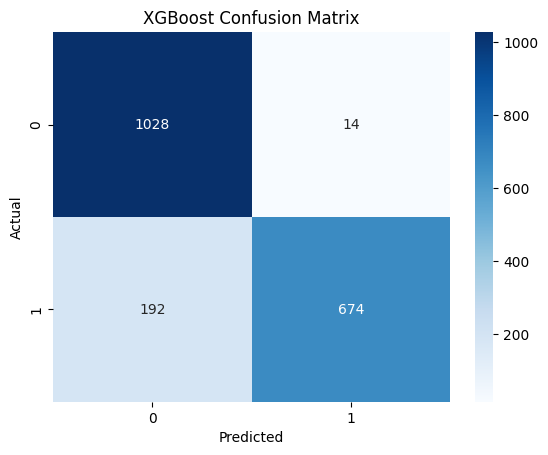

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for XGBoost
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()
